In [438]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1. vote: Party choice: Conservative or Labour
2. age: in years
3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.
4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.\
5. Blair: Assessment of the Labour leader, 1 to 5.
6. Hague: Assessment of the Conservative leader, 1 to 5.
7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.
8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
9. gender: female or male.

In [439]:
df = pd.read_excel('C:\\Users\\Vishal.Shah\\Desktop\\Machine Learning Week3\\Election_Data.xlsx',sheet_name= 'Election_Dataset_Two Classes')
df = df.drop('Unnamed: 0',axis = 1)

In [440]:
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


In [441]:
df.nunique()

vote                        2
age                        70
economic.cond.national      5
economic.cond.household     5
Blair                       5
Hague                       5
Europe                     11
political.knowledge         4
gender                      2
dtype: int64

In [442]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [443]:
df.describe(include='all').round(1)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525,1525.0,1525.0,1525.0,1525.0,1525.0,1525.0,1525.0,1525
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,NaN,54.2,3.2,3.1,3.3,2.7,6.7,1.5,NaN
std,NaN,15.7,0.9,0.9,1.2,1.2,3.3,1.1,NaN
min,NaN,24.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN
25%,NaN,41.0,3.0,3.0,2.0,2.0,4.0,0.0,NaN
50%,NaN,53.0,3.0,3.0,4.0,2.0,6.0,2.0,NaN
75%,NaN,67.0,4.0,4.0,4.0,4.0,10.0,2.0,NaN


In [444]:
df.gender.value_counts(), df.vote.value_counts()

(female    812
 male      713
 Name: gender, dtype: int64,
 Labour          1063
 Conservative     462
 Name: vote, dtype: int64)

In [445]:
df_encod= df.copy()
df_encod
df_encod= df_encod.replace(to_replace='Labour',value=2)
df_encod= df_encod.replace(to_replace='Conservative',value=1)
df_encod= df_encod.replace(to_replace='male',value=2)
df_encod= df_encod.replace(to_replace='female',value=1)

In [446]:
df_encod

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,2,43,3,3,4,1,2,2,1
1,2,36,4,4,4,4,5,2,2
2,2,35,4,4,5,2,3,2,2
3,2,24,4,2,2,1,4,0,1
4,2,41,2,2,1,1,6,2,2
...,...,...,...,...,...,...,...,...,...
1520,1,67,5,3,2,4,11,3,2
1521,1,73,2,2,4,4,8,2,2
1522,2,37,3,3,5,4,2,2,2
1523,1,61,3,3,1,4,11,2,2


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vish

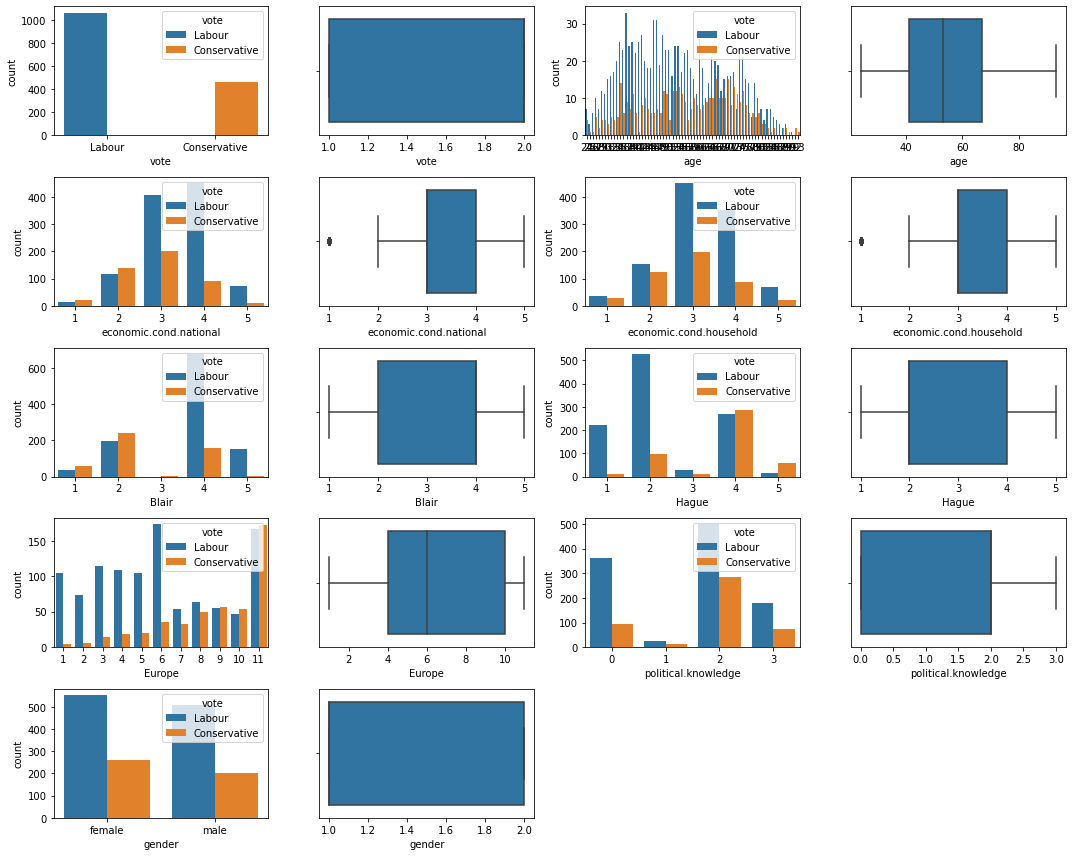

In [447]:
n = 1
plt.figure(figsize=(15,12))
for i in df.columns:
    plt.subplot(5,4,n)
    sns.countplot(df[i],hue = df['vote'])
    n = n + 1
    plt.subplot(5,4,n)
    sns.boxplot(df_encod[i])
    n = n + 1
    plt.tight_layout()

<AxesSubplot:xlabel='age', ylabel='Count'>

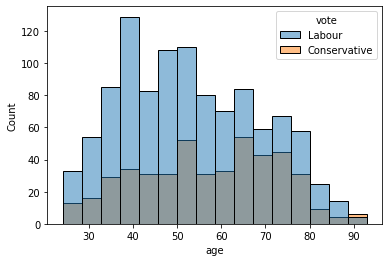

In [448]:
sns.histplot(x =df['age'],hue= df['vote'])


In [449]:
df.describe(include='all').round(1)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525,1525.0,1525.0,1525.0,1525.0,1525.0,1525.0,1525.0,1525
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,NaN,54.2,3.2,3.1,3.3,2.7,6.7,1.5,NaN
std,NaN,15.7,0.9,0.9,1.2,1.2,3.3,1.1,NaN
min,NaN,24.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN
25%,NaN,41.0,3.0,3.0,2.0,2.0,4.0,0.0,NaN
50%,NaN,53.0,3.0,3.0,4.0,2.0,6.0,2.0,NaN
75%,NaN,67.0,4.0,4.0,4.0,4.0,10.0,2.0,NaN


C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


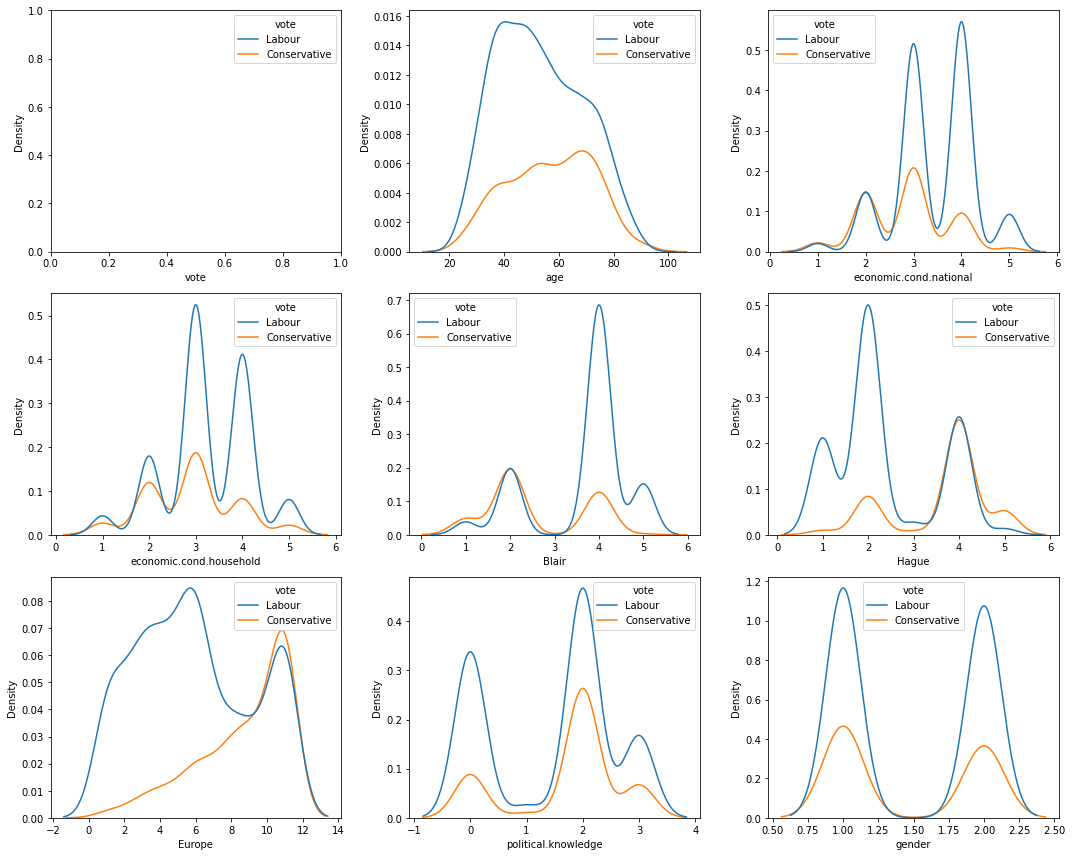

In [450]:
n = 1
plt.figure(figsize=(15,12))
for i in df.columns:
    plt.subplot(3,3,n)
    sns.kdeplot(df_encod[i], hue= df['vote'])
    n = n + 1
    plt.tight_layout()

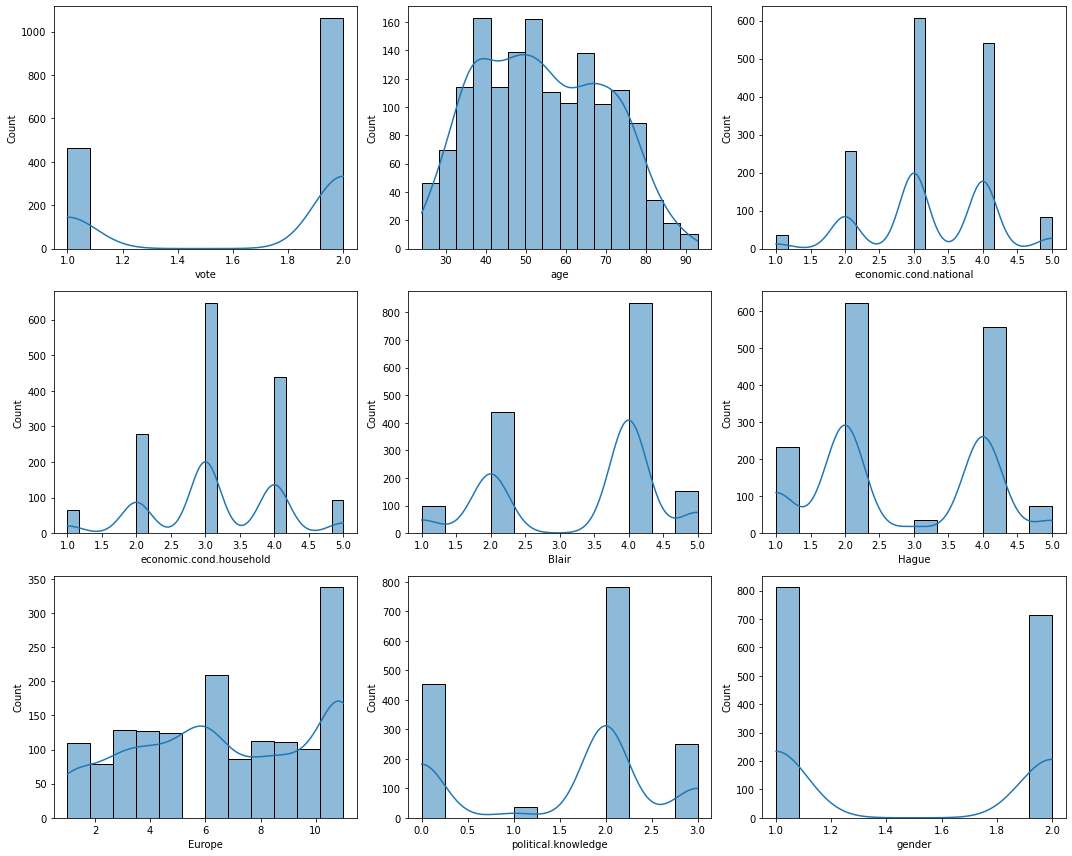

In [451]:
n = 1
plt.figure(figsize=(15,12))
for i in df.columns:
    plt.subplot(3,3,n)
    sns.histplot(df_encod[i],kde=True)
    n = n + 1
    plt.tight_layout()

In [452]:
for i in df.columns:
    print(pd.crosstab(df[i],df.vote))


vote          Conservative  Labour
vote                              
Conservative           462       0
Labour                   0    1063
vote  Conservative  Labour
age                       
24               4       7
25               1       3
26               1       6
27               5      10
28               2       7
..             ...     ...
89               2       3
90               1       0
91               0       1
92               2       0
93               1       0

[70 rows x 2 columns]
vote                    Conservative  Labour
economic.cond.national                      
1                                 21      16
2                                140     117
3                                200     407
4                                 92     450
5                                  9      73
vote                     Conservative  Labour
economic.cond.household                      
1                                  28      37
2                                

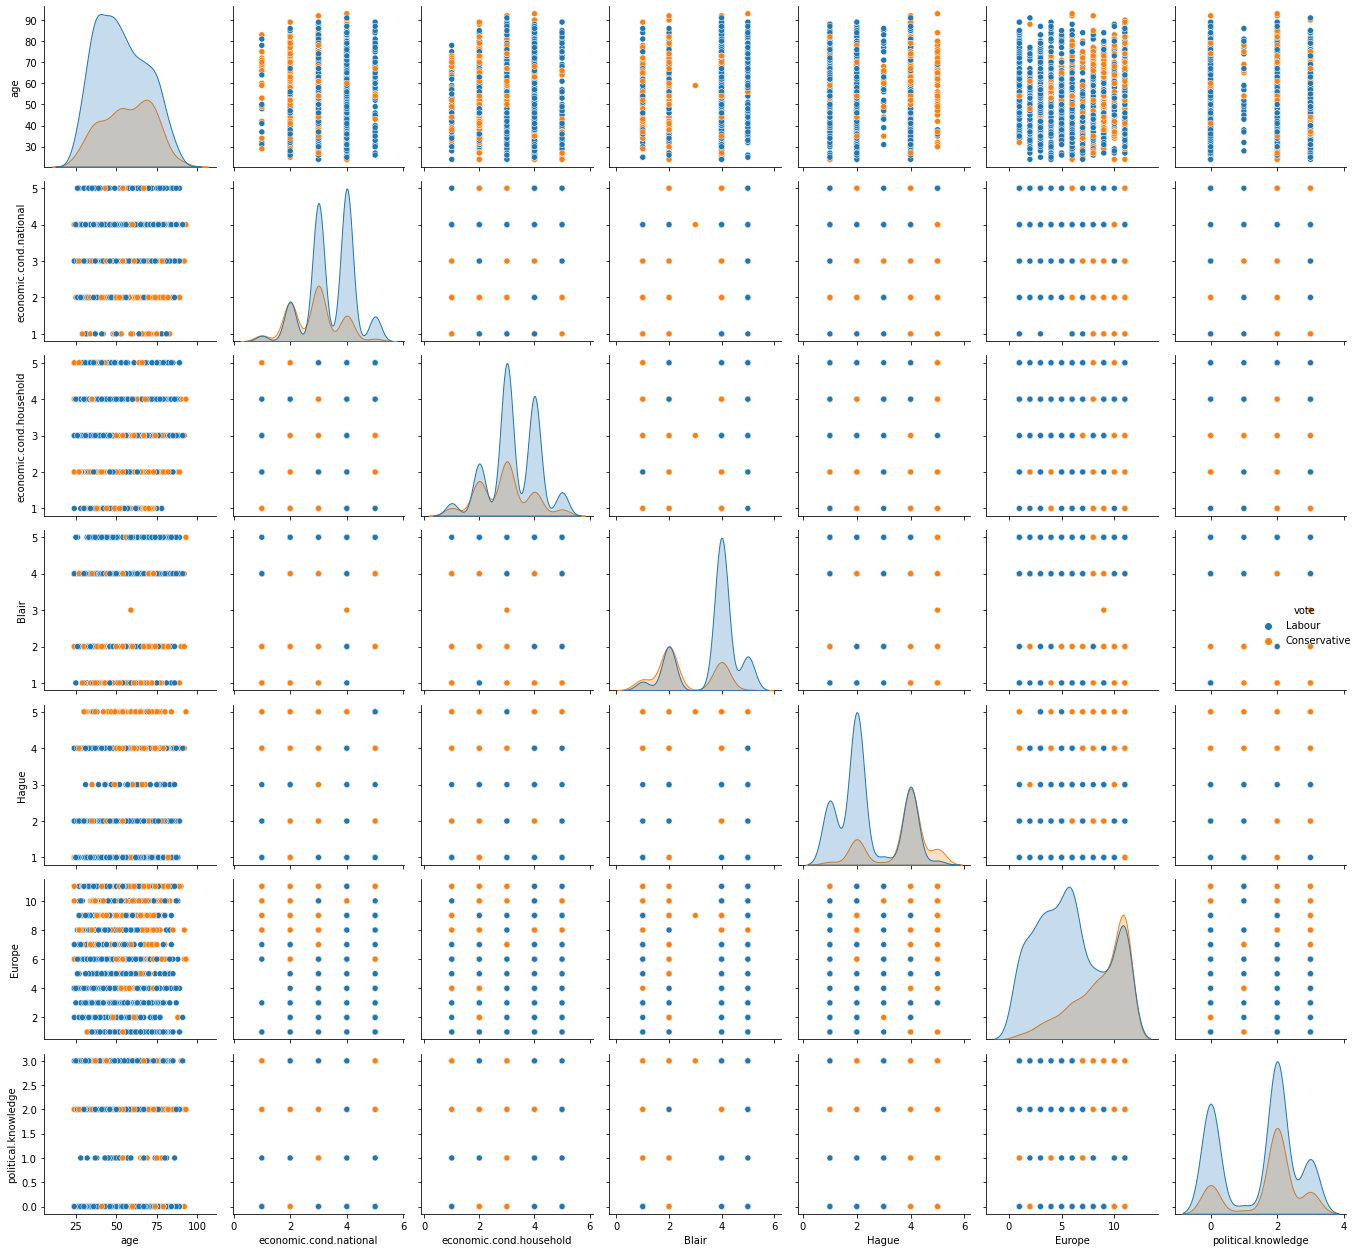

In [453]:
sns.pairplot(df,hue = 'vote')
plt.tight_layout()

<AxesSubplot:>

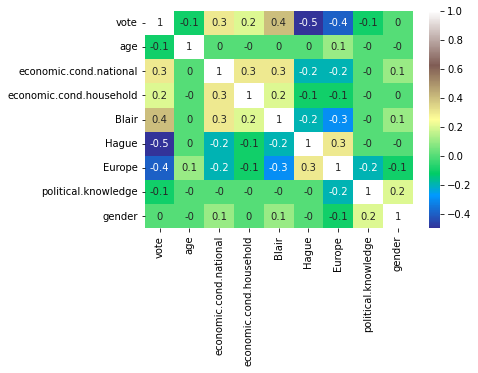

In [454]:
sns.heatmap(df_encod.corr().round(1),annot= True, cmap = 'terrain')

In [455]:
df_encod.drop_duplicates(inplace= True)
df.drop_duplicates(inplace= True)

In [456]:
df_encod.shape

(1517, 9)

In [457]:
df[df['economic.cond.national'] == 1 ].count()

vote                       37
age                        37
economic.cond.national     37
economic.cond.household    37
Blair                      37
Hague                      37
Europe                     37
political.knowledge        37
gender                     37
dtype: int64

In [458]:
df[df['economic.cond.household'] == 1 ].count()

vote                       65
age                        65
economic.cond.national     65
economic.cond.household    65
Blair                      65
Hague                      65
Europe                     65
political.knowledge        65
gender                     65
dtype: int64

In [459]:
df_encod.describe()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.696770,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541,1.467370
std,0.459805,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417,0.499099
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,1.000000
50%,2.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,1.000000
75%,2.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,2.000000
max,2.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000,2.000000


In [460]:
#  min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encod = scaler.fit_transform(df_encod)
df_encod

array([[1.        , 0.27536232, 0.5       , ..., 0.1       , 0.66666667,
        0.        ],
       [1.        , 0.17391304, 0.75      , ..., 0.4       , 0.66666667,
        1.        ],
       [1.        , 0.15942029, 0.75      , ..., 0.2       , 0.66666667,
        1.        ],
       ...,
       [1.        , 0.1884058 , 0.5       , ..., 0.1       , 0.66666667,
        1.        ],
       [0.        , 0.53623188, 0.5       , ..., 1.        , 0.66666667,
        1.        ],
       [0.        , 0.72463768, 0.25      , ..., 1.        , 0.        ,
        0.        ]])

In [461]:
df_encod = pd.DataFrame(df_encod, columns=['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'])

In [462]:
df_encod

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1.0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0.0
1,1.0,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1.0
2,1.0,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1.0
3,1.0,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0.0
4,1.0,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1.0
...,...,...,...,...,...,...,...,...,...
1512,0.0,0.623188,1.00,0.50,0.25,0.75,1.0,1.000000,1.0
1513,0.0,0.710145,0.25,0.25,0.75,0.75,0.7,0.666667,1.0
1514,1.0,0.188406,0.50,0.50,1.00,0.75,0.1,0.666667,1.0
1515,0.0,0.536232,0.50,0.50,0.00,0.75,1.0,0.666667,1.0


In [463]:
# Copy all the predictor variables into X dataframe
X = df_encod[['age', 'economic.cond.national', 'economic.cond.household','Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']]

# Copy target into the y dataframe.  
y = df_encod['vote']

In [464]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.30,random_state=1)

## Logistic Regression

In [465]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_score, recall_score

# Fit model on train
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)

# predict on train and test
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)


In [466]:
model_score = model.score(X_train, y_train)
print(model_score)

0.8350612629594723


In [467]:
model_score = model.score(X_test, y_test)
print(model_score)

0.8289473684210527


<AxesSubplot:>

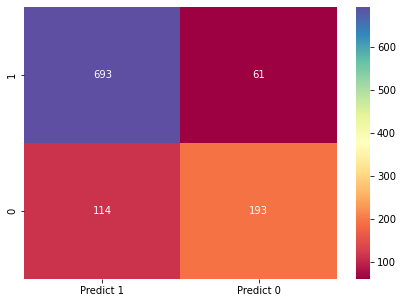

In [468]:
# Training dataset
cm = metrics.confusion_matrix(y_train, y_train_predict , labels = [1 , 0])

df_cm = pd.DataFrame(cm, index= [i for i in ["1","0"]],
                    columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm, annot = True , cmap= 'Spectral', fmt='.4g')

In [469]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_train_predict).ravel()
print("TN= ",(tn),"FP= ",(fp),"FN=", fn,"TP=", tp)

TN=  193 FP=  114 FN= 61 TP= 693


In [470]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

         0.0       0.76      0.63      0.69       307
         1.0       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061



<AxesSubplot:>

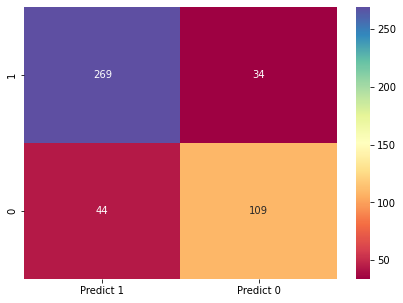

In [471]:
# Test dataset
cm = metrics.confusion_matrix(y_test, y_test_predict , labels = [1 , 0])

df_cm = pd.DataFrame(cm, index= [i for i in ["1","0"]],
                    columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm, annot = True , cmap= 'Spectral', fmt='.4g')

In [472]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_predict).ravel()
print("TN= ",(tn),"FP= ",(fp),"FN=", fn,"TP=", tp)

TN=  109 FP=  44 FN= 34 TP= 269


In [473]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.74       153
         1.0       0.86      0.89      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



AUC for the Training Data: 0.890
AUC for the Test Data: 0.882


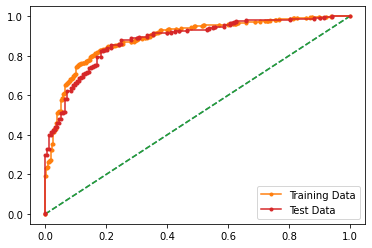

In [474]:
# AUC and ROC for the training data

# calculate AUC
pred_prob_train = model.predict_proba(X_train)

auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Discriminant Analysis

In [475]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA_model = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [476]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)

In [477]:
print(model_score)  #training data 

0.8341187558906692


<AxesSubplot:>

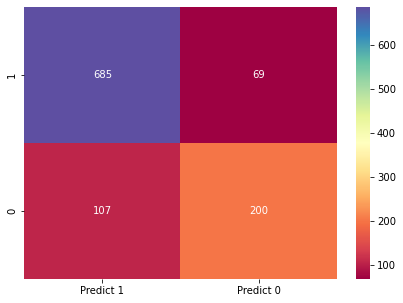

In [478]:
cm = metrics.confusion_matrix(y_train, y_train_predict, labels = [1 , 0])

df_cm = pd.DataFrame(cm, index= [i for i in ["1","0"]],
                    columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm, annot = True , cmap= 'Spectral', fmt='.4g')

In [479]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_train_predict).ravel()
print("TN= ",(tn),"FP= ",(fp),"FN=", fn,"TP=", tp)

TN=  200 FP=  107 FN= 69 TP= 685


In [480]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

         0.0       0.74      0.65      0.69       307
         1.0       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [481]:
# predict for test data
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)

In [482]:
print(model_score)         # testing data

0.8333333333333334


<AxesSubplot:>

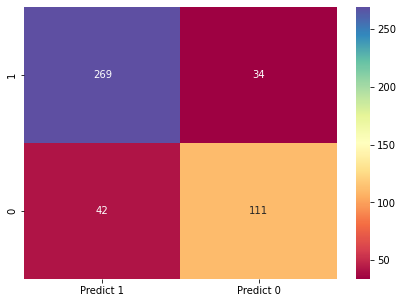

In [483]:
cm = metrics.confusion_matrix(y_test, y_test_predict, labels = [1 , 0])

df_cm = pd.DataFrame(cm, index= [i for i in ["1","0"]],
                    columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm, annot = True , cmap= 'Spectral', fmt='.4g')

In [484]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_predict).ravel()
print("TN= ",(tn),"FP= ",(fp),"FN=", fn,"TP=", tp)

TN=  111 FP=  42 FN= 34 TP= 269


In [485]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

         0.0       0.77      0.73      0.74       153
         1.0       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC for the Training Data: 0.890
AUC for the Test Data: 0.882


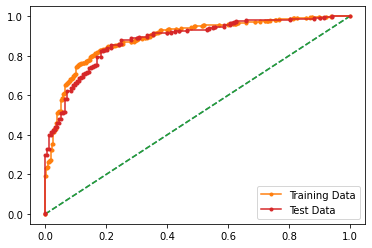

In [486]:
# AUC and ROC for the training data

# calculate AUC
pred_prob_train = model.predict_proba(X_train)

auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## KNN MODEL

In [487]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=8)
# fit the model
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [488]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)

In [489]:
print(model_score)  #training data 

0.8407163053722903


<AxesSubplot:>

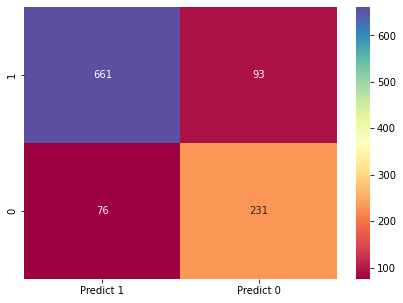

In [490]:
cm = metrics.confusion_matrix(y_train, y_train_predict, labels = [1 , 0])

df_cm = pd.DataFrame(cm, index= [i for i in ["1","0"]],
                    columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm, annot = True , cmap= 'Spectral', fmt='.4g')

In [491]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_train_predict).ravel()
print("TN= ",(tn),"FP= ",(fp),"FN=", fn,"TP=", tp)

TN=  231 FP=  76 FN= 93 TP= 661


In [492]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73       307
         1.0       0.90      0.88      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [493]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)                      ## Accuracy

In [494]:
print(model_score)         # testing data

0.8333333333333334


<AxesSubplot:>

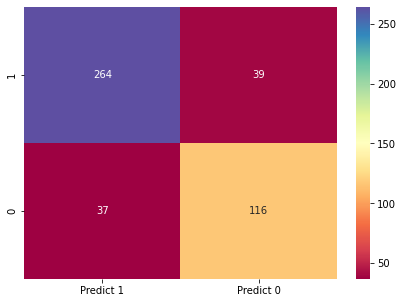

In [495]:
cm = metrics.confusion_matrix(y_test, y_test_predict, labels = [1 , 0])

df_cm = pd.DataFrame(cm, index= [i for i in ["1","0"]],
                    columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm, annot = True , cmap= 'Spectral', fmt='.4g')

In [496]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_predict).ravel()
print("TN= ",(tn),"FP= ",(fp),"FN=", fn,"TP=", tp)

TN=  116 FP=  37 FN= 39 TP= 264


In [497]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

         0.0       0.75      0.76      0.75       153
         1.0       0.88      0.87      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



In [498]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)
    
# # changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.24342105263157898,
 0.20175438596491224,
 0.17982456140350878,
 0.1600877192982456,
 0.1578947368421053,
 0.16666666666666663,
 0.16228070175438591,
 0.1578947368421053,
 0.16228070175438591,
 0.16447368421052633]

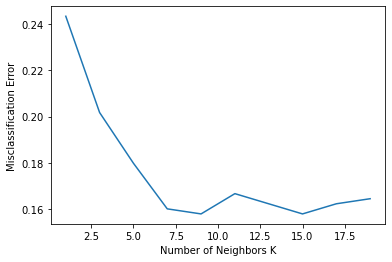

In [499]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [500]:
# Optimum K is around 8 or 15 where MCE is least

AUC for the Training Data: 0.890
AUC for the Test Data: 0.882


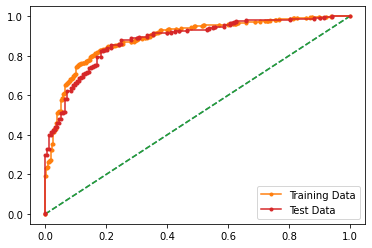

In [501]:
# AUC and ROC for the training data

# calculate AUC
pred_prob_train = model.predict_proba(X_train)

auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Gaussian Naive Bayes

In [502]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [503]:
NB_model = GaussianNB()
# fit the model

NB_model.fit(X_train, y_train)

GaussianNB()

In [504]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy

In [505]:
print(model_score)  #training data 

0.8350612629594723


<AxesSubplot:>

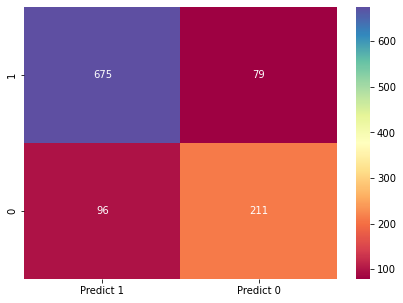

In [506]:
cm = metrics.confusion_matrix(y_train, y_train_predict, labels = [1 , 0])

df_cm = pd.DataFrame(cm, index= [i for i in ["1","0"]],
                    columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm, annot = True , cmap= 'Spectral', fmt='.4g')

In [507]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_train_predict).ravel()
print("TN= ",(tn),"FP= ",(fp),"FN=", fn,"TP=", tp)

TN=  211 FP=  96 FN= 79 TP= 675


In [508]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71       307
         1.0       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [509]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                      ## Accuracy

In [510]:
print(model_score)         # testing data

0.8223684210526315


<AxesSubplot:>

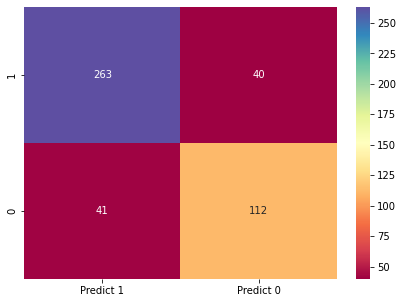

In [511]:
cm = metrics.confusion_matrix(y_test, y_test_predict, labels = [1 , 0])

df_cm = pd.DataFrame(cm, index= [i for i in ["1","0"]],
                    columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm, annot = True , cmap= 'Spectral', fmt='.4g')

In [512]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_test_predict).ravel()
print("TN= ",(tn),"FP= ",(fp),"FN=", fn,"TP=", tp)

TN=  112 FP=  41 FN= 40 TP= 263


In [513]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73       153
         1.0       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC for the Training Data: 0.890
AUC for the Test Data: 0.882


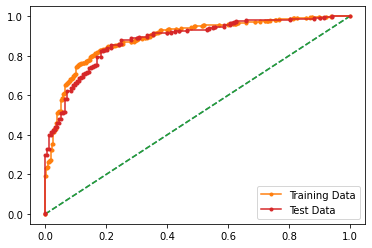

In [514]:
# AUC and ROC for the training data

# calculate AUC
pred_prob_train = model.predict_proba(X_train)

auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Ada Boost

In [515]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1).fit(X_train, y_train)

In [516]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)

In [517]:
print(model_score)

0.8501413760603205


<AxesSubplot:>

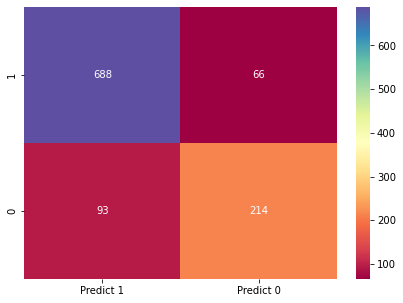

In [518]:
cm = metrics.confusion_matrix(y_train, y_train_predict, labels = [1 , 0])

df_cm = pd.DataFrame(cm, index= [i for i in ["1","0"]],
                    columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm, annot = True , cmap= 'Spectral', fmt='.4g')

In [519]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73       307
         1.0       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [520]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)

In [521]:
print(model_score)

0.8135964912280702


<AxesSubplot:>

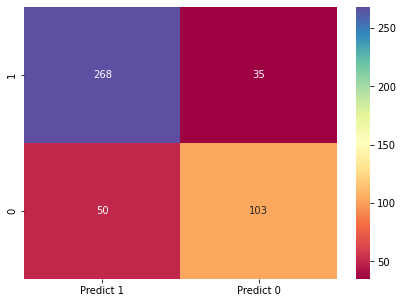

In [522]:
cm = metrics.confusion_matrix(y_test, y_test_predict, labels = [1 , 0])

df_cm = pd.DataFrame(cm, index= [i for i in ["1","0"]],
                    columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm, annot = True , cmap= 'Spectral', fmt='.4g')

In [523]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71       153
         1.0       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



AUC for the Training Data: 0.915
AUC for the Test Data: 0.877


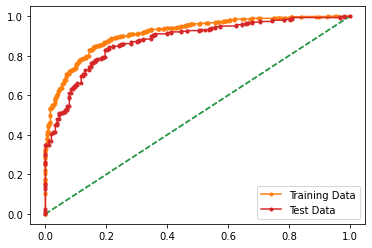

In [524]:
# AUC and ROC for the training data

# calculate AUC
pred_prob_train = ADB_model.predict_proba(X_train)

auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
# Test Data Probability Prediction
pred_prob_test = ADB_model.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Gradient Boosting

In [525]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [526]:
## Performance Matrix on train data set

y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)

In [527]:
print(model_score)

0.8925541941564562


<AxesSubplot:>

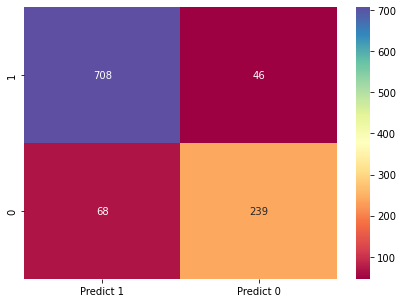

In [528]:
cm = metrics.confusion_matrix(y_train, y_train_predict, labels = [1 , 0])

df_cm = pd.DataFrame(cm, index= [i for i in ["1","0"]],
                    columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm, annot = True , cmap= 'Spectral', fmt='.4g')

In [529]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       307
         1.0       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [530]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)

In [531]:
print(model_score)

0.8333333333333334


<AxesSubplot:>

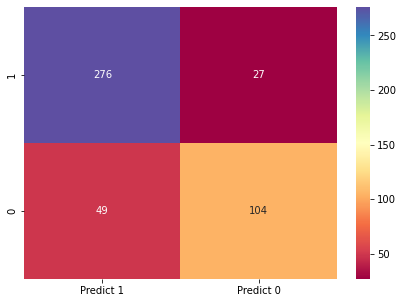

In [532]:
cm = metrics.confusion_matrix(y_test, y_test_predict, labels = [1 , 0])

df_cm = pd.DataFrame(cm, index= [i for i in ["1","0"]],
                    columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm, annot = True , cmap= 'Spectral', fmt='.4g')

In [533]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73       153
         1.0       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC for the Training Data: 0.890
AUC for the Test Data: 0.882


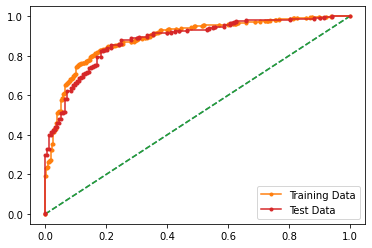

In [534]:
# AUC and ROC for the training data

# calculate AUC
pred_prob_train = model.predict_proba(X_train)

auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Bagging

In [535]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=10,bootstrap=True, random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=1)

In [536]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score = Bagging_model.score(X_train, y_train)

In [537]:
print(model_score)

0.9868049010367578


<AxesSubplot:>

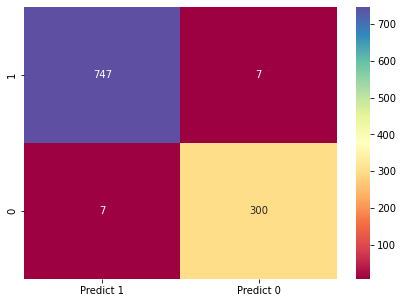

In [538]:
cm = metrics.confusion_matrix(y_train, y_train_predict, labels = [1 , 0])

df_cm = pd.DataFrame(cm, index= [i for i in ["1","0"]],
                    columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm, annot = True , cmap= 'Spectral', fmt='.4g')

In [539]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       307
         1.0       0.99      0.99      0.99       754

    accuracy                           0.99      1061
   macro avg       0.98      0.98      0.98      1061
weighted avg       0.99      0.99      0.99      1061



In [540]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)

In [541]:
print(model_score)

0.7982456140350878


<AxesSubplot:>

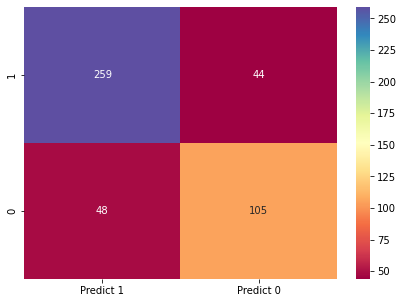

In [542]:
cm = metrics.confusion_matrix(y_test, y_test_predict, labels = [1 , 0])

df_cm = pd.DataFrame(cm, index= [i for i in ["1","0"]],
                    columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm, annot = True , cmap= 'Spectral', fmt='.4g')

In [543]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

         0.0       0.70      0.69      0.70       153
         1.0       0.84      0.85      0.85       303

    accuracy                           0.80       456
   macro avg       0.77      0.77      0.77       456
weighted avg       0.80      0.80      0.80       456



AUC for the Training Data: 0.999
AUC for the Test Data: 0.852


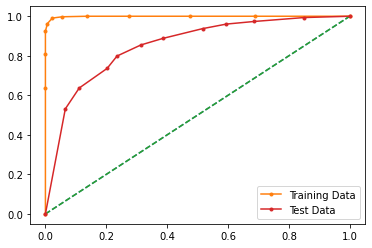

In [544]:
# AUC and ROC for the training data

# calculate AUC
pred_prob_train = Bagging_model.predict_proba(X_train)

auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
# Test Data Probability Prediction
pred_prob_test = Bagging_model.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Applying GridSearchCV for Logistic Regression

In [545]:
from sklearn.model_selection import GridSearchCV

In [546]:
grid= {'penalty':['l2'],
       'solver':['lbfgs', 'liblinear', 'sag', 'saga']}

In [547]:
model =LogisticRegression(max_iter=5000)

In [548]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=3, scoring='f1')

In [549]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=5000),
             param_grid={'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='f1')

In [550]:
grid_search.best_params_

{'penalty': 'l2', 'solver': 'liblinear'}

In [551]:
best_model =grid_search.best_estimator_

In [552]:
ytrain_predict =best_model.predict(X_train)
# print(ytrain_predict)

ytrain_predict_prob = best_model.predict_proba(X_train)
# pd.DataFrame(ytrain_predict_prob)

In [553]:
model_score= best_model.score(X_train, y_train)
model_score

0.8350612629594723

<AxesSubplot:>

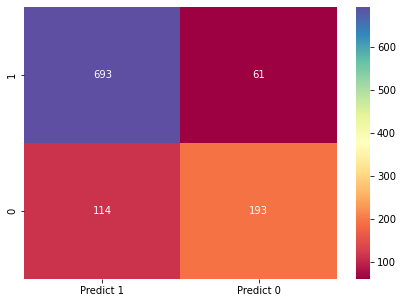

In [554]:
cm = metrics.confusion_matrix(y_train, ytrain_predict, labels = [1 , 0])

df_cm = pd.DataFrame(cm, index= [i for i in ["1","0"]],
                    columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm, annot = True , cmap= 'Spectral', fmt='.4g')

In [555]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.76      0.63      0.69       307
         1.0       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [556]:
ytest_predict =best_model.predict(X_test)
# print(ytest_predict)

ytest_predict_prob = best_model.predict_proba(X_test)
# pd.DataFrame(ytest_predict_prob)

In [557]:
model_score= best_model.score(X_test, y_test)
model_score

0.8289473684210527

<AxesSubplot:>

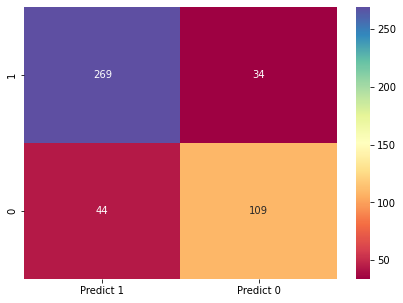

In [558]:
cm = metrics.confusion_matrix(y_test, ytest_predict, labels = [1 , 0])

df_cm = pd.DataFrame(cm, index= [i for i in ["1","0"]],
                    columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm, annot = True , cmap= 'Spectral', fmt='.4g')

In [559]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.74       153
         1.0       0.86      0.89      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



AUC for the Training Data: 0.890
AUC for the Test Data: 0.882


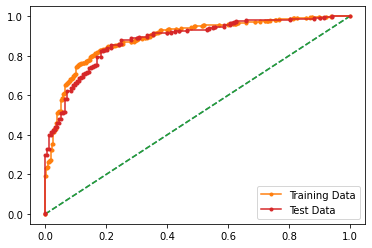

In [560]:
best_model = model
pred_prob_train = ytrain_predict_prob

auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
# Test Data Probability Prediction
pred_prob_test = ytest_predict_prob
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Applying GridSearchCV for Linear Discriminant Analysis

In [561]:
grid= {'solver':['svd', 'lsqr', 'eigen']}

In [562]:
model =LinearDiscriminantAnalysis(solver='svd',tol=0.0001)

In [563]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=3, scoring='f1')

In [564]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen']}, scoring='f1')

In [565]:
grid_search.best_params_

{'solver': 'svd'}

In [566]:
best_model =grid_search.best_estimator_

In [567]:
ytrain_predict =best_model.predict(X_train)
# print(ytrain_predict)

ytrain_predict_prob = best_model.predict_proba(X_train)
# pd.DataFrame(ytrain_predict_prob)

<AxesSubplot:>

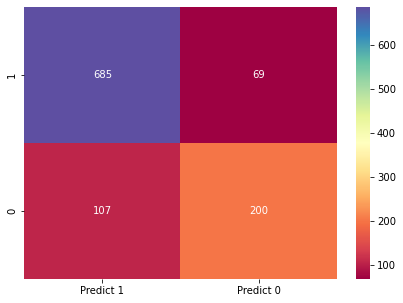

In [568]:
cm = metrics.confusion_matrix(y_train, ytrain_predict, labels = [1 , 0])

df_cm = pd.DataFrame(cm, index= [i for i in ["1","0"]],
                    columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm, annot = True , cmap= 'Spectral', fmt='.4g')

In [569]:
model_score = grid_search.score(X_train, y_train)
model_score

0.8861578266494178

In [570]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.74      0.65      0.69       307
         1.0       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [571]:
ytest_predict =best_model.predict(X_test)
# print(ytest_predict)

ytest_predict_prob = best_model.predict_proba(X_test)
# pd.DataFrame(ytest_predict_prob)

<AxesSubplot:>

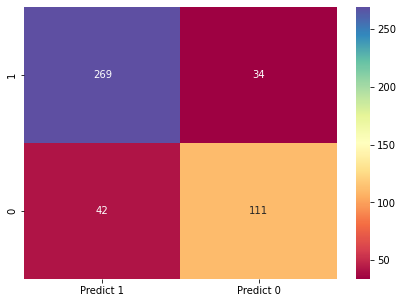

In [572]:
cm = metrics.confusion_matrix(y_test, ytest_predict, labels = [1 , 0])

df_cm = pd.DataFrame(cm, index= [i for i in ["1","0"]],
                    columns= [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize= (7,5))
sns.heatmap(df_cm, annot = True , cmap= 'Spectral', fmt='.4g')

In [573]:
model_score = grid_search.score(X_test, y_test)
model_score

0.8762214983713356

In [574]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.77      0.73      0.74       153
         1.0       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC for the Training Data: 0.890
AUC for the Test Data: 0.884


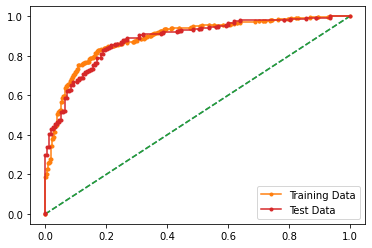

In [227]:
best_model = model
pred_prob_train = ytrain_predict_prob

auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# AUC and ROC for the test data

# calculate AUC
# Test Data Probability Prediction
pred_prob_test = ytest_predict_prob
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

